<a href="https://colab.research.google.com/github/hongyan627/5207assignment/blob/main/%E2%80%9CDatathon3_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import io
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import resample
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing PyTorch library as 't' for convenience
import torch as t
import torch.nn as nn
# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from tensorflow.keras.preprocessing.sequence import pad_sequences

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [3]:
uploaded = files.upload()
df_mHealth = pd.read_csv(io.BytesIO(uploaded['mhealth.csv']))
df_mHealth.head()

Saving mhealth.csv to mhealth.csv


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [4]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = df_mHealth.isnull().sum()
missing_value_counts

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

Luckly, we did not observe any missing values in our dataset. Also, we need to check the balance within the dataset

In [5]:
# Replace categorical values with numerical equivalents
df_mHealth['subject'].replace({'subject1' : 1,
                               'subject2' : 2,
                               'subject3' : 3,
                               'subject4' : 4,
                               'subject5' : 5,
                               'subject6' : 6,
                               'subject7' : 7,
                               'subject8' : 8,
                               'subject9' : 9}, inplace=True)

In [6]:
df_mHealth['subject']

0         1
1         1
2         1
3         1
4         1
         ..
999994    9
999995    9
999996    9
999997    9
999998    9
Name: subject, Length: 999999, dtype: int64

In [7]:
grouped = df_mHealth.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((740414, 14), (259585, 14))

In [8]:
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
650497,-0.77206,-9.4262,-4.9999,0.25788,-0.90807,0.16896,-12.1360,-1.9945,0.54611,-0.59020,0.71663,0.31466,0,6
650498,-4.59760,-9.2246,-2.6530,0.31354,-0.87992,0.18664,-9.2323,-1.5408,-1.07700,-0.59020,0.71663,0.31466,0,6
650499,-5.00190,-8.9910,-3.0621,0.31354,-0.87992,0.18664,-6.5812,-1.7471,-2.71240,-0.70784,0.64271,0.19612,0,6
650500,-2.74880,-9.2327,-2.4787,0.31354,-0.87992,0.18664,-5.0034,-1.7464,-3.63940,-0.70784,0.64271,0.19612,0,6
650501,-2.98880,-8.9681,-2.7491,0.26902,-0.87430,0.25344,-4.1554,-1.8952,-3.52180,-0.70784,0.64271,0.19612,0,6


In [9]:
# standardized this dataset

# Identifying numerical columns (excluding 'Activity' and 'subject')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')
numerical_columns.remove('subject')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
650497,-0.552567,0.055747,-0.810059,0.578981,-0.800349,0.501238,-1.814050,0.678081,-0.577362,-0.556227,2.101663,0.012934,0,6
650498,-1.531305,0.104970,-0.369903,0.693642,-0.720535,0.533071,-1.213665,0.758524,-0.989728,-0.556227,2.101663,0.012934,0,6
650499,-1.634742,0.162005,-0.446628,0.693642,-0.720535,0.533071,-0.665509,0.721946,-1.405218,-0.770194,1.968628,-0.202877,0,6
650500,-1.058302,0.102992,-0.337213,0.693642,-0.720535,0.533071,-0.339275,0.722070,-1.640731,-0.770194,1.968628,-0.202877,0,6
650501,-1.119704,0.167596,-0.387926,0.601930,-0.704601,0.653347,-0.163938,0.695687,-1.610853,-0.770194,1.968628,-0.202877,0,6


In [10]:
# make sure all the activity is in the training and testing dataset
print(train_df['Activity'].unique())
print(test_df['Activity'].unique())

[ 0  1  2  3  4  6  7  8  9 10 11 12  5]
[ 0  1  3  2  4  5  6  7  8  9 10 11 12]


In [11]:
# Checking the class distribution in the 'Activity' column of the training set
class_distribution = train_df.groupby('subject').apply(lambda x : x.iloc[::-1]['Activity']).value_counts()
class_distribution

0     530225
1      21504
2      19262
5      18432
11     18432
10     18432
9      18432
4      18432
3      18432
6      17665
8      17511
7      17460
12      6195
Name: Activity, dtype: int64

Now, we need to deal with the imbalance in this dataset. we can observe that there are more than 500K 0s in our dataset, which are much larger compared with the other categories. Here, we downsampled 0 in our dataset. Also, we get only 6k values for category 12, we need to apply upsampling for this category.

In [12]:
train_df['subject'].unique()

array([6, 1, 9, 3, 5, 4, 7])

In [13]:
test_df['subject'].unique()

array([8, 2])

Also, we need to figure out which subject is in the training dataset and which subject is in the test dataset. From the command line above, we may observe that subject 2 and 8 are in the test dataset; whereas, subject 1, 3, 4, 5, 6, 7 and 9 are in the training dataset. The code in the tutorial is not suitable
for our dataset, so I wrote a helper function to get all the subsets.

In [14]:
# This is acutally a hard coding helper function, specifically designed for this training dataset.
# If you run with other seeds, please make sure to change this helper function.
def group_activity(grouped_by_subject, activity_value):
  df1 = grouped_by_subject.get_group(1)[grouped_by_subject.get_group(1)['Activity'] == activity_value]
  df3 = grouped_by_subject.get_group(3)[grouped_by_subject.get_group(3)['Activity'] == activity_value]
  df4 = grouped_by_subject.get_group(4)[grouped_by_subject.get_group(4)['Activity'] == activity_value]
  df5 = grouped_by_subject.get_group(5)[grouped_by_subject.get_group(5)['Activity'] == activity_value]
  df6 = grouped_by_subject.get_group(6)[grouped_by_subject.get_group(6)['Activity'] == activity_value]
  df7 = grouped_by_subject.get_group(7)[grouped_by_subject.get_group(7)['Activity'] == activity_value]
  df9 = grouped_by_subject.get_group(9)[grouped_by_subject.get_group(9)['Activity'] == activity_value]
  frames = [df1, df3, df4, df5, df6, df7, df9]
  result = pd.concat(frames)
  return result

In [15]:
# Grouping the original training data by 'subject'
grouped_by_subject = train_df.groupby('subject')

# Creating separate lists for class 0 and 12
groups_act_0 = group_activity(grouped_by_subject, 0)
groups_act_1 = group_activity(grouped_by_subject, 1)
groups_act_2 = group_activity(grouped_by_subject, 2)
groups_act_3 = group_activity(grouped_by_subject, 3)
groups_act_4 = group_activity(grouped_by_subject, 4)
groups_act_5 = group_activity(grouped_by_subject, 5)
groups_act_6 = group_activity(grouped_by_subject, 6)
groups_act_7 = group_activity(grouped_by_subject, 7)
groups_act_8 = group_activity(grouped_by_subject, 8)
groups_act_9 = group_activity(grouped_by_subject, 9)
groups_act_10 = group_activity(grouped_by_subject, 10)
groups_act_11 = group_activity(grouped_by_subject, 11)
groups_act_12 = group_activity(grouped_by_subject, 12)

In [16]:
# this is a test to check whether my fuction is doing well.
groups_act_12

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
113408,1.139594,-0.806086,-2.204122,0.613384,-0.592890,-0.942016,-2.195532,1.490036,-0.590644,-0.973483,1.528870,0.558307,12,1
113409,-2.585327,1.106389,-0.509138,0.613384,-0.592890,-0.942016,-3.721462,1.478865,-0.922253,-0.973483,1.528870,0.558307,12,1
113410,-1.971355,1.582572,-1.256085,0.578981,-0.571596,-0.945563,-3.708642,1.297907,-1.445994,-0.973483,1.362559,0.648553,12,1
113411,-2.516479,-0.838315,-0.974051,0.578981,-0.571596,-0.945563,-3.705954,2.084702,-1.762756,-0.973483,1.362559,0.648553,12,1
113412,-2.122404,-2.361624,-0.623317,0.578981,-0.571596,-0.945563,-3.749375,2.041156,-0.127729,-0.973483,1.362559,0.648553,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851708,0.825291,-1.468246,-1.065555,0.384083,-0.943958,0.306679,1.166702,0.534552,-0.309763,0.281867,-0.548010,0.923223,12,7
851709,0.577737,-0.215221,-0.450754,0.384083,-0.943958,0.306679,1.537391,1.632377,-1.535804,0.281867,-0.392786,1.060549,12,7
851710,1.730387,3.519023,0.793195,0.277066,-0.938656,0.426948,0.691567,1.894559,-1.569950,0.281867,-0.392786,1.060549,12,7
851711,-1.698677,2.429832,2.732516,0.277066,-0.938656,0.426948,0.049941,1.346329,-0.857645,0.281867,-0.392786,1.060549,12,7


In [17]:
len(groups_act_12)

6195

In [18]:
# Downsampling the majority groups and oversampling the minority groups (activity 0 and activity 12)
# Using resample to duplicate records in groups_class_1 to match the number of records in groups_class_0
downsampled_groups_act_0 = resample(groups_act_0, replace=True, n_samples=len(groups_act_1),  random_state=34924)
# Similarly, oversampling records in groups_class_2 to match the number in groups_class_0
oversampled_groups_act_12 = resample(groups_act_12, replace=True, n_samples=len(groups_act_1), random_state=37813)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = pd.concat([downsampled_groups_act_0, groups_act_1, groups_act_2,
                             groups_act_3, groups_act_4, groups_act_5, groups_act_6, groups_act_7, groups_act_8, groups_act_9,
                             groups_act_10, groups_act_11, oversampled_groups_act_12], ignore_index=True)
df_final = balanced_groups.sort_values(by=['subject', 'Activity'], ignore_index=True)
df_final


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.461277,0.481439,-0.606532,-1.137052,1.492379,-1.111825,0.135666,-0.613735,2.325750,-0.217417,-1.383165,0.205187,0,1
1,0.103302,0.071349,0.203426,-0.697527,-0.518406,0.808985,0.145756,-0.787442,-0.460065,-1.205292,-0.134114,-0.371590,0,1
2,-0.419664,-0.017452,-0.118344,-1.419872,-0.183272,-0.574131,0.245251,-0.637281,-0.541925,1.840342,-1.035821,-0.438296,0,1
3,0.039213,-0.316058,-0.583595,-0.636386,0.050783,-1.515072,-0.164268,-0.839924,-0.355316,0.417384,-1.094852,-1.250492,0,1
4,-0.058647,0.478655,-0.448298,0.831230,-0.922693,-0.209775,-1.421403,0.947307,-1.124405,-0.588311,2.316008,0.103162,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246997,-0.161642,0.168085,0.949535,-0.911563,0.226318,1.307769,-0.672250,0.574250,1.058653,-0.752369,1.676680,0.562239,2,9
246998,-0.159710,0.201608,0.925435,-0.911563,0.226318,1.307769,-0.633130,0.577229,0.979462,-0.752369,1.676680,0.562239,2,9
246999,-0.159638,0.167499,0.904580,-0.949776,0.236978,1.332526,-0.715753,0.580740,0.974432,-0.780906,1.654508,0.534767,2,9
247000,-0.149440,0.186812,0.901504,-0.949776,0.236978,1.332526,-0.677233,0.584499,1.003801,-0.780906,1.654508,0.534767,2,9


In [19]:
# Need to modify the subject:
index = 0
tmp_value = 0
new_subject = []
for i in range(len(df_final['Activity'])):
  if df_final.iloc[i]['Activity'] == tmp_value:
    new_subject.append(index)
  else:
    tmp_value = df_final.iloc[i]['Activity']
    index = index + 1
    new_subject.append(index)




In [20]:
set(new_subject)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80}

In [21]:
len(new_subject)

247002

In [22]:
df_final['subject'] = new_subject

In [23]:
df_final

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.461277,0.481439,-0.606532,-1.137052,1.492379,-1.111825,0.135666,-0.613735,2.325750,-0.217417,-1.383165,0.205187,0,0
1,0.103302,0.071349,0.203426,-0.697527,-0.518406,0.808985,0.145756,-0.787442,-0.460065,-1.205292,-0.134114,-0.371590,0,0
2,-0.419664,-0.017452,-0.118344,-1.419872,-0.183272,-0.574131,0.245251,-0.637281,-0.541925,1.840342,-1.035821,-0.438296,0,0
3,0.039213,-0.316058,-0.583595,-0.636386,0.050783,-1.515072,-0.164268,-0.839924,-0.355316,0.417384,-1.094852,-1.250492,0,0
4,-0.058647,0.478655,-0.448298,0.831230,-0.922693,-0.209775,-1.421403,0.947307,-1.124405,-0.588311,2.316008,0.103162,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246997,-0.161642,0.168085,0.949535,-0.911563,0.226318,1.307769,-0.672250,0.574250,1.058653,-0.752369,1.676680,0.562239,2,80
246998,-0.159710,0.201608,0.925435,-0.911563,0.226318,1.307769,-0.633130,0.577229,0.979462,-0.752369,1.676680,0.562239,2,80
246999,-0.159638,0.167499,0.904580,-0.949776,0.236978,1.332526,-0.715753,0.580740,0.974432,-0.780906,1.654508,0.534767,2,80
247000,-0.149440,0.186812,0.901504,-0.949776,0.236978,1.332526,-0.677233,0.584499,1.003801,-0.780906,1.654508,0.534767,2,80


In [24]:
# also need to modify this for test_df
# Need to modify the subject:
index = 0
tmp_value = 0
new_subject_test = []
for i in range(len(test_df['Activity'])):
  if test_df.iloc[i]['Activity'] == tmp_value:
    new_subject_test.append(index)
  else:
    tmp_value = test_df.iloc[i]['Activity']
    index = index + 1
    new_subject_test.append(index)

test_df['subject'] = new_subject_test


In [25]:
test_df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
853249,-0.500869,-0.047019,-0.161105,-0.254192,1.295543,1.569530,0.240951,-0.650207,-0.868364,-0.745239,0.305663,-1.332891,0,0
853250,-0.461978,-0.030172,-0.167988,-0.254192,1.295543,1.569530,0.285012,-0.687494,-0.876329,-0.738110,0.320438,-1.364278,0,0
853251,-0.394346,-0.015767,-0.174759,-0.284762,1.290241,1.594288,0.244879,-0.662512,-0.853367,-0.738110,0.320438,-1.364278,0,0
853252,-0.464104,-0.046800,-0.145201,-0.284762,1.290241,1.594288,0.280381,-0.689125,-0.855272,-0.738110,0.320438,-1.364278,0,0
853253,-0.467039,-0.025143,-0.152216,-0.284762,1.290241,1.594288,0.251082,-0.662512,-0.853367,-0.738110,0.320438,-1.364278,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291836,-0.218656,-0.051488,0.237374,-0.177744,-0.683308,-1.087049,-0.389353,-1.021485,0.311819,1.062887,-1.172599,-0.112631,0,50
291837,-0.237072,-0.058959,0.221322,-0.177744,-0.683308,-1.087049,-0.457007,-1.126982,0.423351,1.062887,-1.172599,-0.112631,0,50
291838,-0.203413,-0.049461,0.208259,-0.177744,-0.683308,-1.087049,-0.287149,-0.923790,0.313521,1.062887,-1.172599,-0.112631,0,50
291839,-0.264186,0.023103,0.210600,-0.193030,-0.688638,-1.090596,-0.187426,-0.877513,0.356534,1.062887,-1.172599,-0.112631,0,50


In [26]:
# Checking the new class distribution in the balanced dataset
print(df_final.groupby('subject').apply(lambda x : x.iloc[::-1]['Activity']).value_counts())

0     21504
1     21504
12    21504
2     19262
3     18432
4     18432
5     18432
9     18432
10    18432
11    18432
6     17665
8     17511
7     17460
Name: Activity, dtype: int64


We can see that from the display above, each activity has round 20k rows in this dataset.

In [29]:
#Regroup and encode avtivity variable
def encode_activity(activity):
    if activity in [0, 1, 2, 3]:
        return 0  # No activity
    elif activity in [4, 5, 6, 7]:
        return 1  # light activity
    elif activity in [8, 9, 10, 11, 12]:
        return 2  # intense activity
    else:
        return None

df_final['activity_encoded'] = df_final['Activity'].apply(encode_activity)
test_df['activity_encoded'] = test_df['Activity'].apply(encode_activity)

In [30]:
# Now, we need to do the sequence generation
# Group by 'subject' and create sequences

grouped = df_final.groupby('subject', sort=False)
sequences = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped]
targets = [group['Activity'].iloc[-1] for _, group in grouped]  # Assuming all records for a incident have the same target

# Padding sequences
max_length = max(len(s) for s in sequences)
# We cal also go with max_length
padded_sequences = pad_sequences(sequences, maxlen=3000, padding='post', dtype='float')

padded_sequences.shape


(81, 3000, 13)

In [31]:
targets

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2]

In [32]:
#Testing sequences

# Group by 'subject' and create sequences
grouped_test = test_df.groupby('subject', sort=False)
sequences_test = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped_test]
targets_test = [group['Activity'].iloc[-1] for _, group in grouped_test]  # Assuming all records for an activity have the same target

# Padding sequences for the test set
padded_sequences_test = pad_sequences(sequences_test, maxlen=3000, padding='post', dtype='float')

padded_sequences_test.shape

(51, 3000, 13)

In [33]:
targets_test

[0,
 1,
 0,
 3,
 0,
 2,
 0,
 4,
 0,
 5,
 0,
 5,
 0,
 6,
 0,
 7,
 0,
 8,
 0,
 9,
 0,
 10,
 0,
 11,
 0,
 12,
 0,
 5,
 0,
 1,
 0,
 2,
 0,
 3,
 0,
 4,
 0,
 6,
 0,
 7,
 0,
 8,
 0,
 10,
 0,
 11,
 0,
 12,
 0,
 9,
 0]

In [34]:
# Create RNN with PyTorch

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 128  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 200
learning_rate = 0.001
batch_size = 256
landa = 0.00001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        loss = loss_fn(out, Y) + landa * l2_term
        #loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/200 ---> Train Accuracy: 8.641975308641975%, Validation Accuracy: 7.8431372549019605%
Epoch 1/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 7.8431372549019605%
Epoch 2/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 5.882352941176471%
Epoch 3/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 5.882352941176471%
Epoch 4/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 3.9215686274509802%
Epoch 5/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 3.9215686274509802%
Epoch 6/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 3.9215686274509802%
Epoch 7/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 3.9215686274509802%
Epoch 8/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 3.9215686274509802%
Epoch 9/200 ---> Train Accuracy: 7.407407407407407%, Validation Accuracy: 3.9215686274509802%
Epoch 10/200 ---> Train Accuracy: 7.407407407407407%, Validati

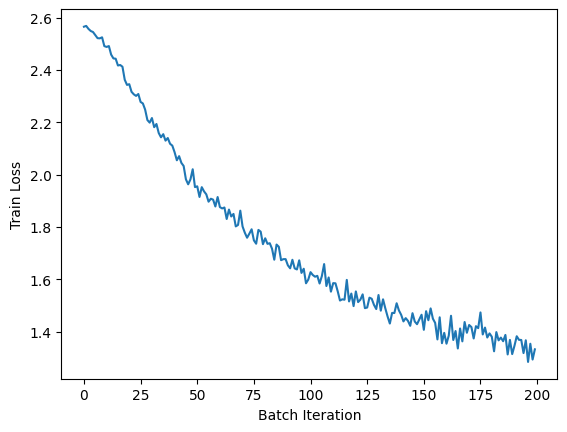

In [35]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

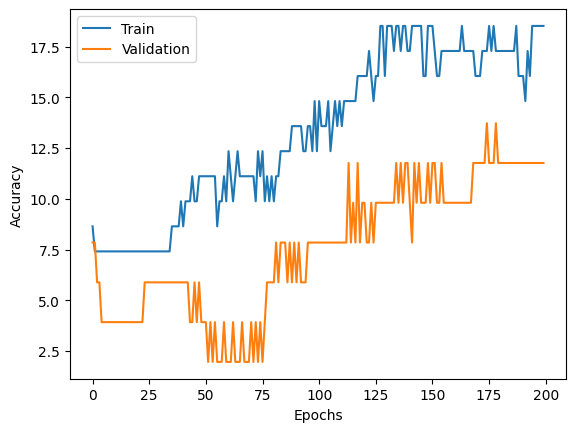

In [36]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [37]:
# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 100
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/100 ---> Train Accuracy: 13.580246913580247%, Validation Accuracy: 7.8431372549019605%
Epoch 1/100 ---> Train Accuracy: 19.753086419753085%, Validation Accuracy: 13.72549019607843%
Epoch 2/100 ---> Train Accuracy: 30.864197530864196%, Validation Accuracy: 19.607843137254903%
Epoch 3/100 ---> Train Accuracy: 39.50617283950617%, Validation Accuracy: 19.607843137254903%
Epoch 4/100 ---> Train Accuracy: 43.20987654320987%, Validation Accuracy: 25.49019607843137%
Epoch 5/100 ---> Train Accuracy: 39.50617283950617%, Validation Accuracy: 27.45098039215686%
Epoch 6/100 ---> Train Accuracy: 45.67901234567901%, Validation Accuracy: 23.529411764705884%
Epoch 7/100 ---> Train Accuracy: 44.44444444444444%, Validation Accuracy: 33.333333333333336%
Epoch 8/100 ---> Train Accuracy: 48.148148148148145%, Validation Accuracy: 29.41176470588235%
Epoch 9/100 ---> Train Accuracy: 46.91358024691358%, Validation Accuracy: 21.568627450980394%
Epoch 10/100 ---> Train Accuracy: 40.74074074074074%, Valida